Plot the total fields
Plot the xy gradient as a map
Plot the z gradient as a map

In [6]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import fields as f
import fields_plot as fp

# from b26_toolkit.src.data_analyis import nv_optical_properties as nv

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt

%matplotlib inline

ImportError: No module named 'b26_toolkit'

## define the general parameters

In [3]:
#     a: radius in um
#     Br: surface magnetization in Teslas
#     phi_m: polar angle in deg
#     theta_m: azimuthal angle in deg
#     d_bead_z: distance top of bead to NV plane
#     mu_0: vacuum permeability ( T m /A)
#     d_bead_z: distance between bead and z plane
#     dx: distance between points (in um)
#     x_min, x_max, y_min, y_max: plot dimensions (in um)

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 0,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':5
}



duration: 0.01 min


## plot total magnetic field

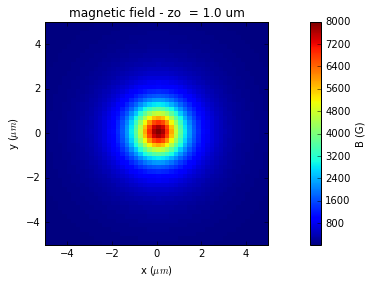

In [4]:
data = f.calc_B_field_single_dipole(p)
fig = fp.plot_Bfield_mag(data, title ='total magnetic field')

# save figure
# fig.savefig('data/'+f.p_to_filename(p) + 'total_field.png')

In [ ]:
## gradient along 

duration: 0.01 min
min max -5.0 5.0


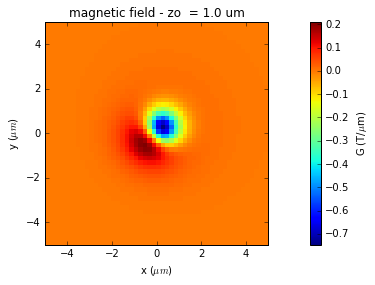

In [5]:
s= np.array([1,1,1])
# s= np.array([1,0,0])
n = np.array([0,0,1])

data = f.calc_Gradient_single_dipole(p, s, n)
fig = fp.plot_G(data, title ='magnetic field - zo  = {:0.1f} um'.format(1))

In [1]:
xmin, xmax = -1,1
dx = 0.2

np.arange(xmin, xmax+dx, dx)

NameError: name 'np' is not defined

In [21]:

def p_to_filename(p):
    """
    create filename from parameters

    if parameters are given in a dictionary "p" call as follows: p_to_filename(*p)

    p: parameters - dictionary with following entries:
        tag: name identifier (string)
    a: radius in um
    Br: surface magnetization in Teslas
    phi_m: polar angle in deg
    theta_m: azimuthal angle in deg
    d_bead_z: distance top of bead to NV plane
    mu_0: vacuum permeability ( T m /A)
    d_bead_z: distance between bead and z plane
    dx: distance between points (in um)
    x_min, x_max, y_min, y_max: plot dimensions (in um)
    """

    filename = '{:s}_a_{:0.1f}um_phi_m_{:2.0f}deg_theta_m_{:2.0f}deg'.format(p['tag'], p['a'], p['phi_m'], p['theta_m'])

    return filename


def p_to_positions(p):
    """
    calculate the positions r where to calculate the fields and the moment vector if the dipole
    p: parameters - dictionary with following entries:
    a: radius in um
    Br: surface magnetization in Teslas
    phi_m: polar angle in deg
    theta_m: azimuthal angle in deg
    d_bead_z: distance top of bead to NV plane
    mu_0: vacuum permeability ( T m /A)
    d_bead_z: distance between bead and z plane
    dx: distance between points (in um)
    x_min, x_max, y_min, y_max: plot dimensions (in um)
    """
    # calculate the magnetic moment
    M = 4*np.pi/3*p['Br']/p['mu_0']
    phi_m =p['phi_m']*np.pi/180
    theta_m =p['theta_m']*np.pi/180
    M = M*np.array([
            np.cos(phi_m)*np.sin(theta_m),
            np.sin(phi_m)*np.sin(theta_m),
            np.cos(theta_m)

        ])


#     xmax, ymax = 3,3 # extend in um
#     xmin, ymin = None,None
    dx = p['dx']

    xmax  = p['xmax']
    if 'xmin' not in p:
        xmin = -xmax
    else:
        xmin = p['xmin']
    if 'ymin' not in p:
        ymin = xmin
    else:
        ymin = p['ymin']
    if 'ymax' not in p:
        ymax = xmax
    else:
        ymin = p['ymin']
        
    zo = p['d_bead_z']+p['a']

    # calculate the grid 
    x = np.arange(xmin, xmax, dx)
    y = np.arange(ymin, ymax, dx)
    Nx, Ny = len(x), len(y)
    X, Y = np.meshgrid(x, y)

    r = np.array([X.flatten(), Y.flatten(), zo*np.ones(len(X.flatten()))]).T
    
    return r, M


(array([[-10. , -10. ,   1.4],
        [ -9.8, -10. ,   1.4],
        [ -9.6, -10. ,   1.4],
        ..., 
        [  9.4,   9.8,   1.4],
        [  9.6,   9.8,   1.4],
        [  9.8,   9.8,   1.4]]),
 array([  8.16431199e-11,   1.33333333e+06,   8.16431199e-11]))

In [12]:


# define the parameters
#tag: name identifier (string)
#a: radius in um
#Br: surface magnetization in Teslas
#phi_m: polar angle in deg
#theta_m: azimuthal angle in deg
#mu_0: vacuum permeability ( T m /A)
#d_bead_z: distance between bead and z plane
#dx: distance between points (in um)
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':10
}

s, n = np.array([-1,-1,-1]),np.array([0,0,1])
s = np.array([-1,1,1])
s = np.array([1,-1,1])
s = s/np.sqrt(3)
n = n/np.sqrt(3)
# def calc_B_field_single_dipole(tag, a, Br, phi_m, theta_m, d_bead_z, dx, x_min, x_max, y_min, y_max, mu_0 = 4 * np.pi * 1e-7)
def calc_B_field_single_dipole(p):
    
    """
    p: parameters - dictionary with following entries:
        tag: name identifier (string)
     a: radius in um
     Br: surface magnetization in Teslas
     phi_m: polar angle in deg
     theta_m: azimuthal angle in deg
     d_bead_z: distance top of bead to NV plane
     mu_0: vacuum permeability ( T m /A)
     d_bead_z: distance between bead and z plane
     dx: distance between points (in um)
     x_min, x_max, y_min, y_max: plot dimensions (in um)
    """
    
    r, M = p_to_positions(p)
    DipolePositions = np.zeros(3) # we assume that the magnet is at 0,0,0
    
    start = time.time()
    data_out = f.calcBfield(r, DipolePositions, M)
#     G = f.calcGradient(r, DipolePositions, M, s, n)
#     data_out['G'] = G['G']
    end = time.time()
    print('duration: {:0.2f} min'.format((end - start)/60) )
    
    if filename not None:
        # save data to csv
        out_file = os.path.join('data/', filename)
        pd.DataFrame.from_dict(data_out).to_csv(out_file, index=False)
    
    return data_out

def calc_Gradient_single_dipole(p):
    
    """
    p: parameters - dictionary with following entries:
        tag: name identifier (string)
     a: radius in um
     Br: surface magnetization in Teslas
     phi_m: polar angle in deg
     theta_m: azimuthal angle in deg
     d_bead_z: distance top of bead to NV plane
     mu_0: vacuum permeability ( T m /A)
     d_bead_z: distance between bead and z plane
     dx: distance between points (in um)
     x_min, x_max, y_min, y_max: plot dimensions (in um)
    """
    
    r, M = p_to_positions(p)
    DipolePositions = np.zeros(3) # we assume that the magnet is at 0,0,0
    
    start = time.time()
    data_out = f.calcGradient(r, DipolePositions, M, s, n)
    end = time.time()
    print('duration: {:0.2f} min'.format((end - start)/60) )
    
    return data_out


filename  = calc_B_field_single_dipole(p)

(10000, 3) (3,) (3,)
duration: 0.02 min


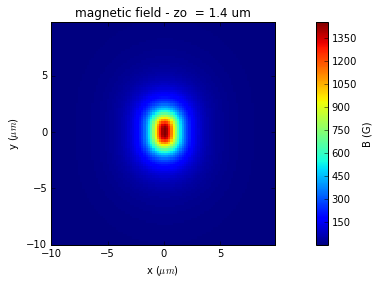

In [2]:
def plot_Gfield(filename, data_folder = '', offset_field = np.zeros(3), target_folder = None):

    
    if target_folder is None:
        target_folder = data_folder
        
        
    in_file = os.path.join(data_folder, filename)
    out_file = os.path.join(target_folder, filename).replace('.csv', '_Gradient.jpg')
    
    data = pd.read_csv(in_file)
    
    Nx, Ny = len(np.unique(data['x'])), len(np.unique(data['y']))
    
    C = data['G']*1e3
    C = C.reshape(Ny, Nx)
    
    X = data['x'].reshape(Ny, Nx)
    Y = data['y'].reshape(Ny, Nx)
    
    xmin, xmax = np.min(X), np.max(X)
    ymin, ymax = np.min(Y), np.max(Y)


    fig = plt.figure(figsize=(15,4))
    CS = plt.pcolormesh(X, Y, C)
    plt.colorbar(label= 'G (x $10^3$ T/m)')
    plt.title('magnetic field - zo  = {:0.1f} um'.format(zo))
    plt.xlabel('x ($\mu m$)')
    plt.ylabel('y ($\mu m$)')

    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

    plt.axes().set_aspect('equal')

    
    
    fig.savefig(out_file)

In [8]:


# define the parameters
#tag: name identifier (string)
#a: radius in um
#Br: surface magnetization in Teslas
#phi_m: polar angle in deg
#theta_m: azimuthal angle in deg
#mu_0: vacuum permeability ( T m /A)
#d_bead_z: distance between bead and z plane
#dx: distance between points (in um)
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2
}

s, n = np.array([-1,-1,-1]),np.array([0,0,1])
s = np.array([-1,1,1])
s = np.array([1,-1,1])
s = s/np.sqrt(3)
n = n/np.sqrt(3)

filename = '{:s}_a_{:0.1f}um_phi_m_{:2.0f}deg_theta_m_{:2.0f}deg.csv'.format(p['tag'], p['a'], p['phi_m'], p['theta_m'])

# calculate the magnetic moment
M = 4*np.pi/3*p['Br']/p['mu_0']
phi_m =p['phi_m']*np.pi/180
theta_m =p['theta_m']*np.pi/180
M = M*np.array([
        np.cos(phi_m)*np.sin(theta_m),
        np.sin(phi_m)*np.sin(theta_m),
        np.cos(theta_m)
    
    ])


xmax, ymax = 3,3 # extend in um
xmin, ymin = None,None
dx = p['dx']

if xmin is None:
    xmin = -xmax
if ymin is None:
    ymin = -ymax
zo = p['d_bead_z']+p['a']
    
# calculate the grid 
x = np.arange(xmin, xmax, dx)
y = np.arange(ymin, ymax, dx)
Nx, Ny = len(x), len(y)
X, Y = np.meshgrid(x, y)
np.shape(X), np.shape(Y)

r = np.array([X.flatten(), Y.flatten(), zo*np.ones(len(X.flatten()))]).T

start = time.time()
DipolePositions = np.zeros([1,3]) # we assume that the magnet is at 0,0,0
data_out = f.calcBfield(r, DipolePositions, M)
G = f.calcGradient(r, DipolePositions, M, s, n)
data_out['G'] = G['G']
end = time.time()
print('duration: {:0.2f} min'.format((end - start)/60) )

# save data to csv
out_file = os.path.join('data/', filename)
pd.DataFrame.from_dict(data_out).to_csv(out_file, index=False)
# data_out = {
#     'x':deepcopy(r[:,0]),
#     'y':deepcopy(r[:,1]),
#     'z':deepcopy(r[:,2]),
#     'Bx':deepcopy(B[:, 0]),
#     'By':deepcopy(B[:, 1]),
#     'Bz':deepcopy(B[:, 2])
# }

# data_out = {
#     'x':r[:,0],
#     'y':r[:,1],
#     'z':r[:,2],
#     'Bx':B[:, 0],
#     'By':B[:, 1],
#     'Bz':B[:, 2]
# }

pd.DataFrame.from_dict(data_out).to_csv(out_file, index=False)

data_folder = 'data'
plot_Gfield(filename, data_folder)

AssertionError: 

In [92]:
np.max(data_out['G'])*np.sqrt(3)

0.058955453120290491

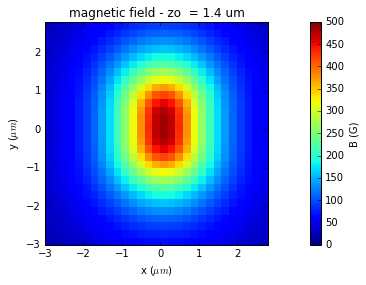

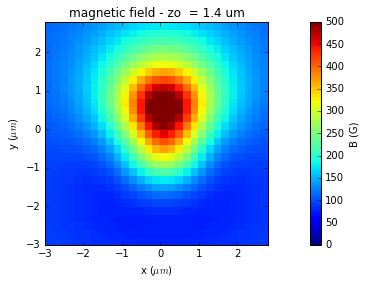

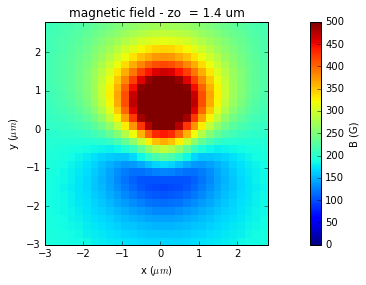

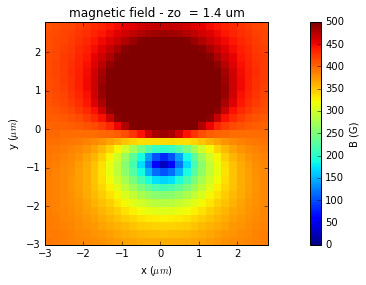

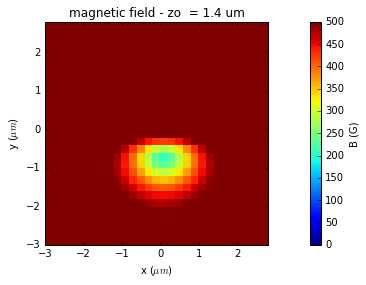

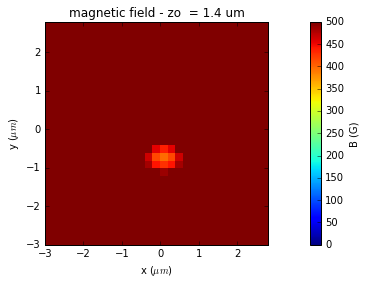

In [93]:
# tag = 'bead_1'
# a = 1.4
# phi_m = 90
# theta_m = 90
# filename = '{:s}_a_{:0.1f}um_phi_m_{:2.0f}deg_theta_m_{:2.0f}deg.csv'.format(tag,a, phi_m, theta_m)
data_folder = 'data'
plot_Bfield(filename, data_folder)
plot_Bfield(filename, data_folder, offset_field = np.array([0,0,0.01]))
plot_Bfield(filename, data_folder, offset_field = np.array([0,0,0.02]))
plot_Bfield(filename, data_folder, offset_field = np.array([0,0,0.04]))
plot_Bfield(filename, data_folder, offset_field = np.array([0,0,0.06]))
plot_Bfield(filename, data_folder, offset_field = np.array([0,0,0.08]))


In [4]:

from copy import deepcopy
